# Introduction to Regression with Neural Networks in TensorFlow

A regression problem can be used for predicting a numerical variable based on some other combination of variables... predicitng a number.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Create data to view and fit

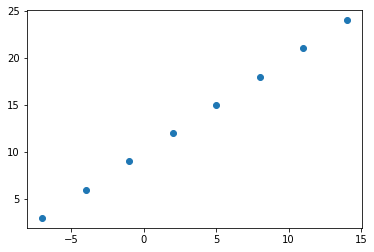

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [74]:
# Relationship to make the neural network learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [75]:
# Create a demo tensor for our housing price prediction
house_info = tf.constant(["bedroon", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroon', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [76]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [77]:
X[0].ndim, y[0].ndim

(0, 0)

In [78]:
X[0], y[0]

(-7.0, 3.0)

They are scalars thus they have dimension of 0

In [79]:
# Turn NumPy arrats into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [80]:
# Check shape and dimensions 
print("Input Shape:", X[0].shape)
print("Ouput Shape:", y[0].shape)
print("X dimensions:", X[0].ndim)
print("y dimensions:", y[0].ndim)

Input Shape: ()
Ouput Shape: ()
X dimensions: 0
y dimensions: 0


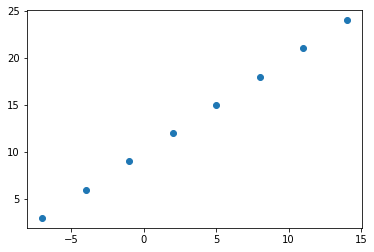

In [81]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preformance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (feature and labels)

In [101]:
# Set a randdom seed
tf. random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
             metrics=["mae"])

#3. Fit the model
X_expand = np.expand_dims(X, axis=1)
y_expand = np.expand_dims(y, axis=1)
print(X)
print(y)
model.fit(X_expand, y_expand, epochs=5)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)
Epoch 1/5
1/1 [==============================] - 0s 204ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [71]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
print("NumPy Array")
print(X)
print(y)

# Turn NumPy arrays into tensors
X_tf = tf.constant(X)
y_tf = tf.constant(y)
print("NumPy Array to Tensor")
print(X)
print(y)

# Expand Array in 1st dimension
X_expand_1 = np.expand_dims(X, axis=1)
y_expand_1 = np.expand_dims(y, axis=1)
print(X_expand_1)
print(y_expand_1)

# Expand Array in 2nd dimension
X_expand_0 = np.expand_dims(X, axis=0)
y_expand_0 = np.expand_dims(y, axis=0)
print(X_expand_0)
print(y_expand_0)

NumPy Array
[-7. -4. -1.  2.  5.  8. 11. 14.]
[ 3.  6.  9. 12. 15. 18. 21. 24.]
NumPy Array to Tensor
[-7. -4. -1.  2.  5.  8. 11. 14.]
[ 3.  6.  9. 12. 15. 18. 21. 24.]
[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]]
[[ 3.]
 [ 6.]
 [ 9.]
 [12.]
 [15.]
 [18.]
 [21.]
 [24.]]
[[-7. -4. -1.  2.  5.  8. 11. 14.]]
[[ 3.  6.  9. 12. 15. 18. 21. 24.]]


In [102]:
# Make a prediction using the model
x = 17.0
y_pred = model.predict([x])
y_pred

array([[12.716021]], dtype=float32)

## Improving the model

1. **Creating a model** - add more layers, increase the number of hidden units within each of the layers, change the activation function of each layer.
2. **Compiling a model** - change the optimization function or the learning rate of the optimization function.
3. **Fitting a model** - Fit with more epochs to train longer or more data (give the model more examples to learn from)

In [106]:
# Rebuilding the model 
# 1. Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])
# 3. Fit the model
model.fit(X_expand,y_expand,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 206ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 2m

Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8981 - mae: 6.8981
Epoch 99/100
1/1 [==============================] - 0s 2ms/step - loss

In [107]:
# Check data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [108]:
# Check whether prediction has imrpoved
model.predict([17.0])

array([[29.739855]], dtype=float32)

### Common ways to improve a deep learning model
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function 
* Change the learning rate 
* Fitting on more data
* Fitting for longer

In [219]:
# Rebuilding the model 
# 1. Create the model (added dense layer)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
             metrics=["mae"])
# 3. Fit the model
model.fit(X_expand,y_expand,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 265ms/step - loss: 9.9581 - mae: 9.9581
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 8.8476 - mae: 8.8476
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 7.6461 - mae: 7.6461
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8298 - mae: 6.8298
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 7.2296 - mae: 7.2296
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 7.5506 - mae: 7.5506
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3327 - mae: 7.3327
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.7671 - mae: 6.7671
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 6.2346 - mae: 6.2346
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 5.7010 - mae: 5.7010
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 5.535

In [220]:
model.predict([17.0])

array([[27.316338]], dtype=float32)

## Evaluating a model

Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate -> -> ->

**Visualize**
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [4]:
# Make a bigger dataset
X = tf.range(-100,100, 4)

# Make labels for the dataset
y = X+10

print(X,y)

tf.Tensor(
[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96], shape=(50,), dtype=int32) tf.Tensor(
[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66  70  74  78  82  86  90  94  98 102 106], shape=(50,), dtype=int32)


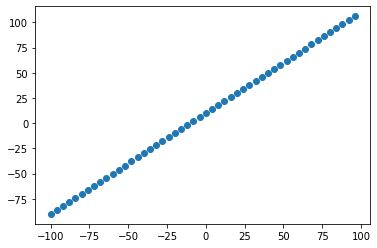

In [5]:
plt.scatter(X,y)

### The 3 sets

In [6]:
# Check length of how many samples there are
len(X)

50

In [7]:
# Split the data into testing and training sets 
X_train = X[:40] # The First 40 are training samples (80% of the data) 
X_test = X[40:] # The last 10 are testing samples (20% of the data)
y_train = y[:40]
y_test = y[40:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data again

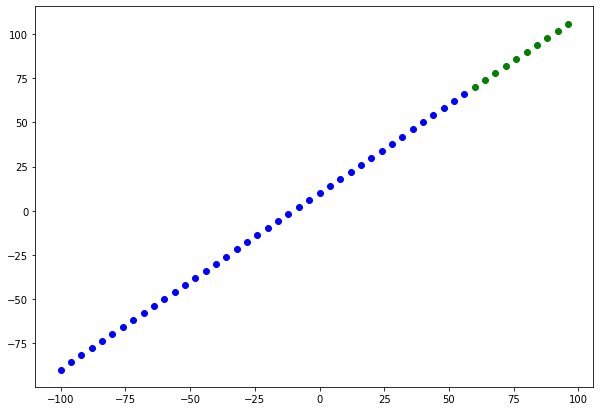

In [79]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train, c="b", label="Training Data")
# Plot the testing data in green
plt.scatter(X_test,y_test, c="g", label="Testing Data")

In [83]:
# Building a meural net for out data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )
# 3. Fit the model
#model.fit(X_train,y_train, epochs=100)

## Visualizing the model

In [84]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [8]:
# Create a model which builds automatically by definind the input_shape
tf.random.set_seed(42)

# 1, Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Test_model")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [9]:
model.summary()

Model: "Test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* Total parameters - total number of parameters in the model. The number of patters it will try and learn
* Trainable parameters - the parameters (patterns) the model can update as it trains 
* Non-trainable parameters - these parameters aren't updated furing training (this is typical when you bring in already learned patters or paremeters from other models during **transfer learning**)

In [10]:
 # Fit the model to the training data
model.fit(X_train, y_train, epochs=100,)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 999us/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 998us/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 2m

2/2 [==============================] - 0s 2ms/step - loss: 24.3047 - mae: 24.3047
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 18.9693 - mae: 18.9693
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1749 - mae: 7.1749
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 18.2784 - mae: 18.2784
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 13.3343 - mae: 13.3343
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 8.7404 - mae: 8.7404
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 14.1947 - mae: 14.1947
Epoch 94/100
2/2 [==============================] - 0s 1ms/step - loss: 17.1955 - mae: 17.1955
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 16.7777 - mae: 16.7777
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1365 - mae: 11.1365
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - l

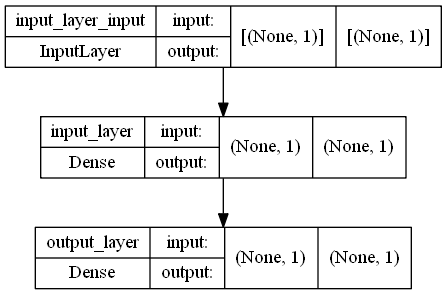

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.
Often you'll see this in the form of y_test or y_true versues y_pred (ground turth versus your model)

In [15]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred

array([[ 69.467125],
       [ 73.9856  ],
       [ 78.50408 ],
       [ 83.02256 ],
       [ 87.54104 ],
       [ 92.05952 ],
       [ 96.577995],
       [101.09647 ],
       [105.61495 ],
       [110.13344 ]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [34]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data/test data and compares predictions to ground truth labels
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    #Plot model predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

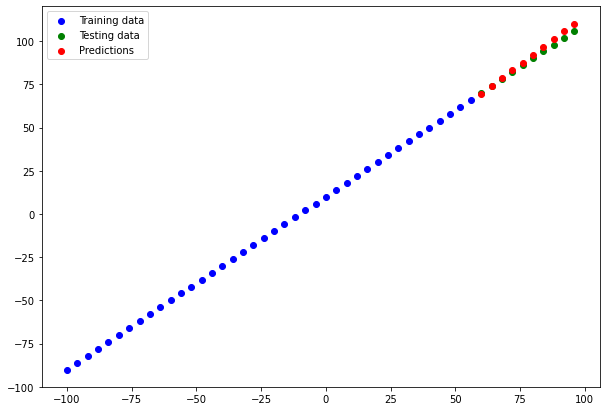

In [17]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem different evaluation metrics will be needed to evaluate a model's performance

With regression:
* MAE - mean absolute error, "On average, how wrong is each of my models predictions"
* MSE - mean square error, the square of the average errors

In [43]:
# Evaluate the model on the test dataset
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 120ms/step - loss: 1.9097 - mae: 1.9097


[1.9097328186035156, 1.9097328186035156]

In [48]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.532875, 14.811518, 12.198367, 10.595488, 10.      , 10.411903,
       11.831198, 14.257884, 17.691961, 22.133438], dtype=float32)>

In [49]:
y_test,y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 array([[ 69.467125],
        [ 73.9856  ],
        [ 78.50408 ],
        [ 83.02256 ],
        [ 87.54104 ],
        [ 92.05952 ],
        [ 96.577995],
        [101.09647 ],
        [105.61495 ],
        [110.13344 ]], dtype=float32))

**notice they are of differing dimensionality**

In [51]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.467125,  73.9856  ,  78.50408 ,  83.02256 ,  87.54104 ,
        92.05952 ,  96.577995, 101.09647 , 105.61495 , 110.13344 ],
      dtype=float32)>

In [52]:
# Calculate the mean absolute error 
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9097328>

In [53]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.45877>

In [24]:
# Make functions to reuse MAE and MSE

def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))
def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

1. Get more data - get more examples for the model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make the model larger (using a complex model) - this might come in the form of more layers or more hidden units in each layer. 
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model 1 layer trained or 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs 
3. `model_3` - 2 layers, trained for 500 epochs

## Build model 1

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100,)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

Epoch 88/100
2/2 [==============================] - 0s 996us/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 1ms/step - loss: 12.6834 - mae: 12.6834
Epoch 98/100
2/2 [==============================] - 0s 2ms

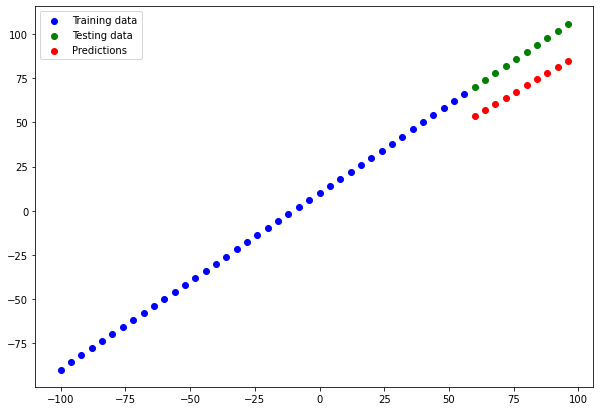

In [19]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [25]:
# Calculate model_1 evaluation metrics 
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

## Build model 2

* 2 Dense layers, trained for 100 epochs

In [40]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1], name="input"),
    tf.keras.layers.Dense(1,input_shape=[1], name="output")
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 2ms/st

2/2 [==============================] - 0s 998us/step - loss: 24.3047 - mae: 24.3047
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 18.9693 - mae: 18.9693
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1749 - mae: 7.1749
Epoch 90/100
2/2 [==============================] - 0s 1ms/step - loss: 18.2784 - mae: 18.2784
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 13.3343 - mae: 13.3343
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 8.7404 - mae: 8.7404
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 14.1947 - mae: 14.1947
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 17.1955 - mae: 17.1955
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 16.7777 - mae: 16.7777
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1365 - mae: 11.1365
Epoch 97/100
2/2 [==============================] - 0s 998us/step

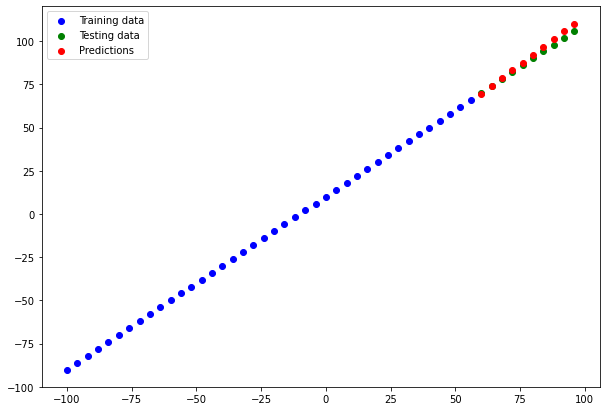

In [42]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [43]:
# Calculate model_1 evaluation metrics 
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9097328>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.45877>)